In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Connect to CEA code

In [22]:
import sys
import os
sys.path.append(os.path.expandvars(r'%USERPROFILE%\Documents\GitHub\CEAforArcGIS'))
from cea import inputlocator

# Locate the scenarios

In [50]:
SCENARIOS_ROOT = r'C:\reference-case'
locators = [inputlocator.InputLocator(os.path.join(SCENARIOS_ROOT, scenario)) for scenario in os.listdir(SCENARIOS_ROOT)
            if os.path.isdir(os.path.join(SCENARIOS_ROOT))]

In [56]:
final_heating_demand = pd.DataFrame()
for locator in locators:
    scenario_name = os.path.basename(locator.scenario_path)
    if os.path.exists(locator.get_total_demand()):
        df = pd.read_csv(locator.get_total_demand())
        final_heating_demand[scenario_name] = df['QHf_MWhyr']

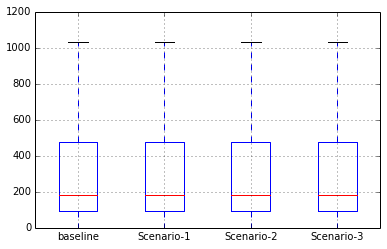

In [60]:
fig = final_heating_demand.boxplot(sym='')
plt.show(fig)

In [61]:
final_heating_demand.sum()

baseline      345707.87
Scenario-1    345707.87
Scenario-2    345707.87
Scenario-3    345707.87
dtype: float64

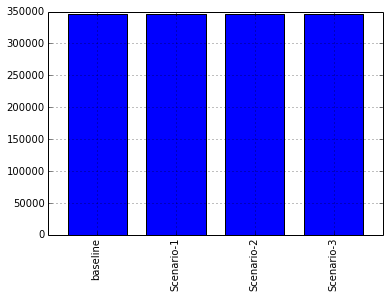

In [65]:
final_heating_demand.sum().plot(kind='bar')

In [74]:
df = pd.read_csv(locator1.get_total_demand()).set_index('Name')
list(df.columns)

['Af_m2',
 'Ealf0_kW',
 'Ealf_MWhyr',
 'Eauxf_MWhyr',
 'Edataf_MWhyr',
 'Ef_MWhyr',
 'Eprof_MWhyr',
 'QCf_MWhyr',
 'QHf_MWhyr',
 'Qcdataf_MWhyr',
 'Qcref_MWhyr',
 'Qcs_MWhyr',
 'Qcsf0_kW',
 'Qcsf_MWhyr',
 'Qhs_MWhyr',
 'Qhsf0_kW',
 'Qhsf_MWhyr',
 'Qww_MWhyr',
 'Qwwf0_kW',
 'Qwwf_MWhyr',
 'Trcs0_C',
 'Trhs0_C',
 'Tscs0_C',
 'Tshs0_C',
 'Tsww0_C',
 'Vw0_m3',
 'Vw_m3yr',
 'mcpcs0_kWC',
 'mcphs0_kWC',
 'occ_pax']

In [79]:
demand_plot_columns = ['Ef_MWhyr', 'QHf_MWhyr', 'QCf_MWhyr']
embodied_plot_columns = ['pen_MJm2', 'pen_GJ', 'ghg_kgm2', 'ghg_ton']
operation_plot_columns = ['pen_MJm2', 'pen_GJ', 'ghg_kgm2', 'ghg_ton']

In [75]:
locator1.get_lca_embodied('pen_MJm2')

'C:\\reference-case\\baseline\\outputs\\data\\emissions\\Total_LCA_embodied.csv'

In [76]:
list(pd.read_csv(locator1.get_lca_embodied()).set_index('Name').columns)

['ghg_kgm2', 'ghg_ton', 'pen_GJ', 'pen_MJm2']

In [78]:
list(pd.read_csv(locator1.get_lca_operation()).set_index('Name').columns)

['pen_GJ', 'ghg_ton', 'pen_MJm2', 'ghg_kgm2']